<a href="https://colab.research.google.com/github/H-Neethika/Digit-Recognition-CNN/blob/main/Digit_recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from IPython.display import Markdown, display

# **First Part: classify MINIST using a simple model**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


*Normaliz data*

In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
print(y_train[0:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [5]:
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test, 10)

In [6]:
print ('one hot encoded labels')
print(y_train[0:100])

one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0

In [7]:
x_train.shape[0] ##Number of data for traning

60000

In [8]:
y_test.shape[0] ##number of data for test

10000

In [9]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50) ##devide data set to small batch (batch size=50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(50)

#**convert 2D image to 1D Vector**

In [10]:
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

print(x_train.shape)  ##original data shape
oneD_data = flatten(x_train)
print(oneD_data.shape) ##flattened shape

(60000, 28, 28)
(60000, 784)


Assingning bias and weight to null tensor

In [11]:
oneD_data

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [12]:
# Weight tensor
w = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))


In [13]:
def forward(x): ## add weight and biase to input
  return tf.matmul(x,w) +b

In [14]:
#softmax calculation to input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)


In [15]:
print("softmax calculation")
print(softmax.numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]


In [16]:
print("verifing normalization")
print(tf.reduce_sum(softmax))

verifing normalization
tf.Tensor(1.0, shape=(), dtype=float32)


In [17]:
print('finding vector with largest value (label assignment)')
print("category", tf.argmax(softmax).numpy())

finding vector with largest value (label assignment)
category 0


In [18]:
##output layer

def activate(x):
  return tf.nn.softmax(forward(x))

In [19]:
##create a model function for convenience
def model(x):
  x = flatten(x)
  return activate(x)

In [20]:
##cost function
def cross_entropy(y_label, y_pred):
  return (-tf.reduce_sum(y_label*tf.math.log(y_pred + 1.e-10)))

cross_entropy(y_train, model(x_train)).numpy()

138155.12

Optimization

> Indented block



In [21]:
##Gradient Descent
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [22]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [w,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [w,b] ) )
    return current_loss.numpy()

TRANING BATCHES

In [23]:
w= tf.Variable(tf.zeros([784,10],tf.float32))
b= tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracties=[]
epochs = 10

for i in range(epochs):
  j=0

  for x_train_batch, y_train_batch in train_ds:
    j+=1
    current_loss= train_step(x_train_batch, y_train_batch)
    if j%500==0:
      print("epoch", str(i), "batch", str(j), "loss", str(current_loss))

  current_loss = cross_entropy(y_train, model(x_train)).numpy()
  loss_values.append(current_loss)
  correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
  accuracties.append(accuracy)
  print("end to epoch", str(i),"loss", str(current_loss), "accuracy", str(accuracy))




epoch 0 batch 500 loss 308.78094
epoch 0 batch 1000 loss 243.85347
end to epoch 0 loss 335063.8 accuracy 0.73728335
epoch 1 batch 500 loss 270.43488
epoch 1 batch 1000 loss 239.25098
end to epoch 1 loss 331978.1 accuracy 0.74156666
epoch 2 batch 500 loss 290.95187
epoch 2 batch 1000 loss 253.18973
end to epoch 2 loss 325348.25 accuracy 0.7507667
epoch 3 batch 500 loss 292.71637
epoch 3 batch 1000 loss 260.54138
end to epoch 3 loss 321318.7 accuracy 0.75453335
epoch 4 batch 500 loss 289.2487
epoch 4 batch 1000 loss 242.80728
end to epoch 4 loss 326882.06 accuracy 0.7500833
epoch 5 batch 500 loss 280.16818
epoch 5 batch 1000 loss 230.50214
end to epoch 5 loss 321615.75 accuracy 0.75516665
epoch 6 batch 500 loss 277.45898
epoch 6 batch 1000 loss 230.25873
end to epoch 6 loss 318383.2 accuracy 0.7596667
epoch 7 batch 500 loss 296.34238
epoch 7 batch 1000 loss 230.25853
end to epoch 7 loss 317834.22 accuracy 0.7604667
epoch 8 batch 500 loss 294.98904
epoch 8 batch 1000 loss 241.22311
end to

In [24]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.7582833
test accuracy 0.7536


Text(0, 0.5, 'loss')

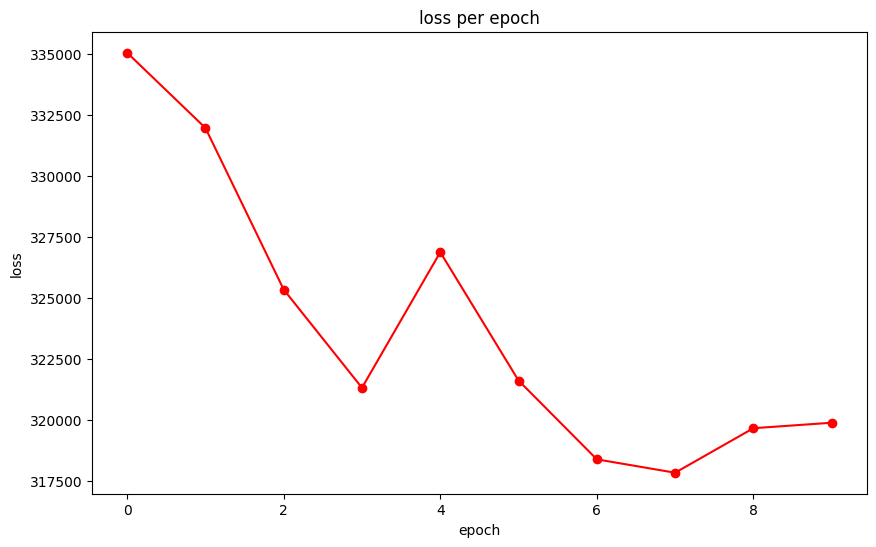

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

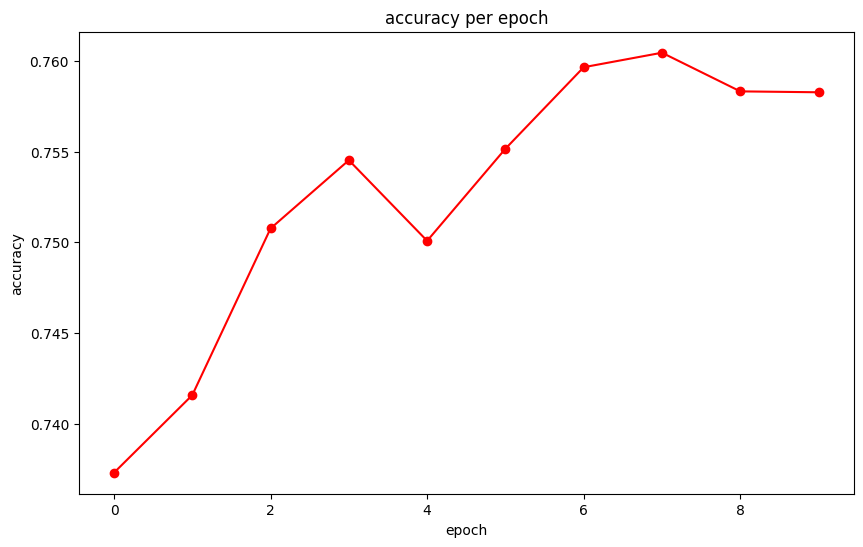

In [26]:
plt.plot(accuracties,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

# **Deep Learning applied to Data set**

In [27]:
#initial parameter

width = 28 #width of image pixel
height = 28 #height of the image in pixel
flat = width*height
class_output = 10 #number od outpot

In [28]:
x_train
x_image_train = tf.reshape(x_train, [-1,28,28,1])
x_image_train = tf.cast(x_image_train,'float32')
x_image_train
x_image_test = tf.reshape(x_test, [-1,28,28,1])
x_image_test = tf.cast(x_image_test,'float32')




In [29]:
# create new dataset with reshape input
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [30]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000,28,28,1])
y_train =tf.slice(y_train,[0,0],[10000, 10])

# **Convolution Layer 1**

In [31]:
#define kernal weight and bias
w_conv1= tf.Variable(tf.random.truncated_normal([5,5,1,32], stddev=0.1, seed=0))
b_conv1= tf.Variable(tf.constant(0.1, shape=[32]))

In [32]:

def convolve1(x):
  return(
      tf.nn.conv2d(x, w_conv1, strides=[1, 1, 1, 1], padding='SAME')+ b_conv1
  )

In [33]:
#apply relu activation function

def h_conv1(x):
  return(tf.nn.relu(convolve1(x)))

In [34]:
#Apply max pooling
def conv1(x):
  return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                        padding='SAME')

# **CONVELUTIONAL LAYER 2**

In [35]:
w_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [36]:
def convolve2(x):
    return(
    tf.nn.conv2d(conv1(x), w_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [37]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [38]:
def conv2(x):
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

# **FULLY CONNECTED LAYER**

In [39]:
#FLATTENING SECOND LAYER
def layer2_matrix(x):
  return tf.reshape(conv2(x), [-1,7*7*64])

In [40]:
#weight and bias between layer 2 and 3
w_fc1 = tf.Variable(tf.random.truncated_normal([7*7*64, 1024], stddev=0.1,seed=2))
b_fc1 =tf.Variable(tf.constant(0.1, shape=[1024]))

In [41]:
#Matrics multiplication
def fc1(x):
  return tf.matmul(layer2_matrix(x), w_fc1)+ b_fc1

In [42]:
#Apply RELU activation
def h_fc1(x):
  return tf.nn.relu(fc1(x))

# **Drop out layer and optional phase for reducing overfitting**

In [43]:
keep_prob = 0.5
def layer_drop(x):
  return tf.nn.dropout(h_fc1(x), keep_prob)

In [44]:
#softmax layer
w_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [45]:
def fc(x): return tf.matmul(layer_drop(x), w_fc2) + b_fc2

In [46]:
#apply softmax activation function
def y_CNN(x): return tf.nn.softmax(fc(x))

# **DEFINE FUNCTION AND TRAIN THE MODEL**

In [47]:
#DEFINE LOSS FUNCTION
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [48]:
#define optimizer
optimizer = tf.keras.optimizers.Adam(1e-4)

In [49]:
variables = [w_conv1, b_conv1, w_conv2, b_conv2,
             w_fc1, b_fc1, w_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()


In [50]:
#define accuracy
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [51]:
#accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [52]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy))

    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )

epoch  0 batch 50 loss: 121.00716 accuracy 0.44
epoch  0 batch 100 loss: 75.54245 accuracy 0.72
epoch  0 batch 150 loss: 50.983532 accuracy 0.74
epoch  0 batch 200 loss: 27.042892 accuracy 0.9
epoch  0 batch 250 loss: 27.622318 accuracy 0.8
epoch  0 batch 300 loss: 29.092493 accuracy 0.78
epoch  0 batch 350 loss: 38.236515 accuracy 0.88
epoch  0 batch 400 loss: 15.107149 accuracy 0.88
epoch  0 batch 450 loss: 26.238718 accuracy 0.86
epoch  0 batch 500 loss: 13.326033 accuracy 0.92
epoch  0 batch 550 loss: 17.96999 accuracy 0.92
epoch  0 batch 600 loss: 17.842535 accuracy 0.88
epoch  0 batch 650 loss: 20.205347 accuracy 0.86
epoch  0 batch 700 loss: 8.720743 accuracy 0.94
epoch  0 batch 750 loss: 24.27078 accuracy 0.9
epoch  0 batch 800 loss: 11.107956 accuracy 0.94
epoch  0 batch 850 loss: 19.435757 accuracy 0.92
epoch  0 batch 900 loss: 9.366347 accuracy 0.92
epoch  0 batch 950 loss: 22.949022 accuracy 0.92
epoch  0 batch 1000 loss: 14.3827095 accuracy 0.9
epoch  0 batch 1050 loss: 5.

In [53]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) )
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))

batch 100 accuracy 0.9
batch 200 accuracy 0.98
batch 300 accuracy 0.94
batch 400 accuracy 0.92
batch 500 accuracy 0.92
batch 600 accuracy 0.9
batch 700 accuracy 0.96
batch 800 accuracy 0.98
batch 900 accuracy 0.96
batch 1000 accuracy 0.92
batch 1100 accuracy 0.94
batch 1200 accuracy 1.0
accuracy of entire set 0.9422


In [54]:
kernels = tf.reshape(tf.transpose(w_conv1, perm=[2, 3, 0,1]),[32, -1])

--2024-04-27 02:56:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/x-python]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2024-04-27 02:56:32 (1.17 GB/s) - ‘utils1.py’ saved [5097/5097]



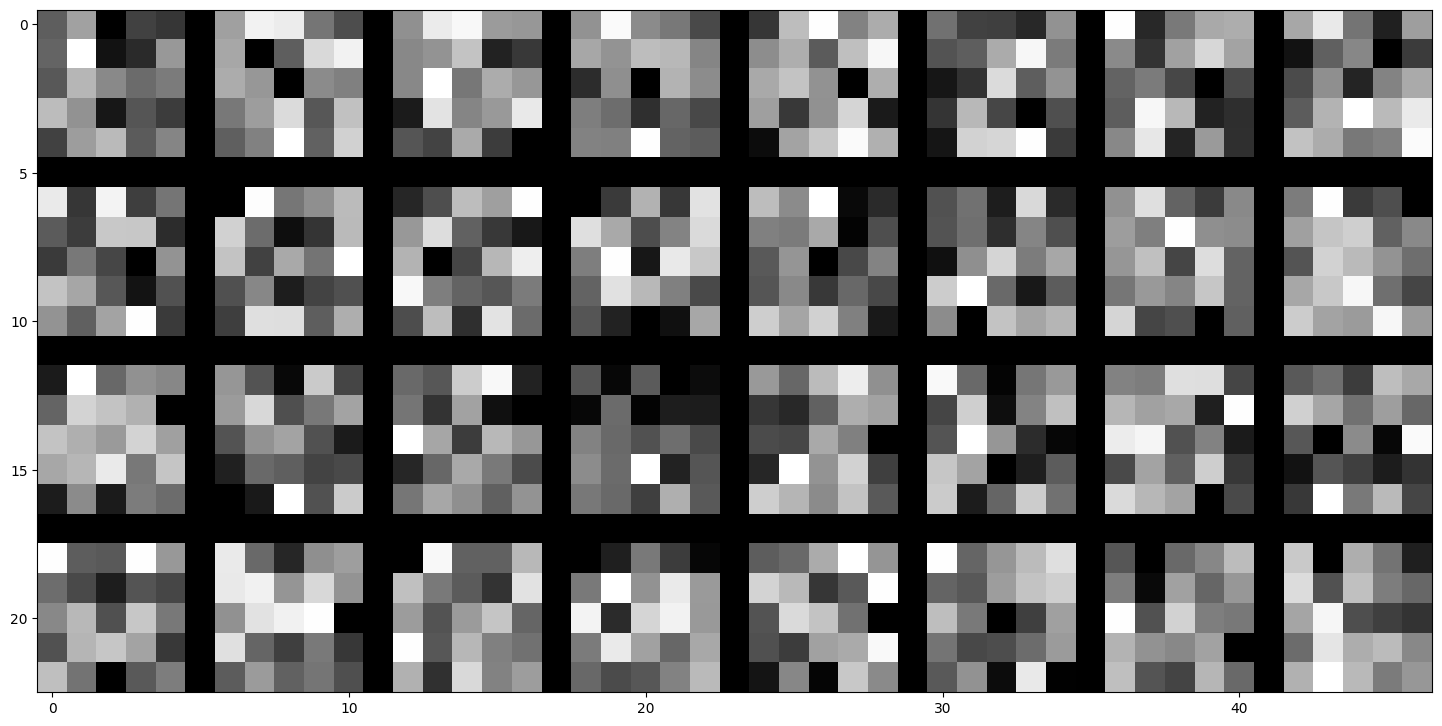

In [55]:
!wget --output-document utils1.py https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week2/data/utils.py
import utils1
import imp
imp.reload(utils1)
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(kernels.numpy(), img_shape=(5, 5) ,tile_shape=(4, 8), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

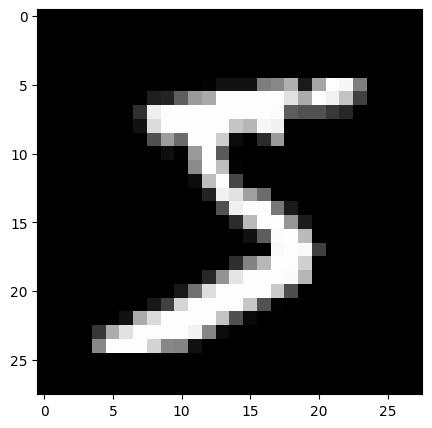

In [56]:
import numpy as np
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = [x_image_train[0]]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

<ipython-input-57-a2334488207a>:9: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


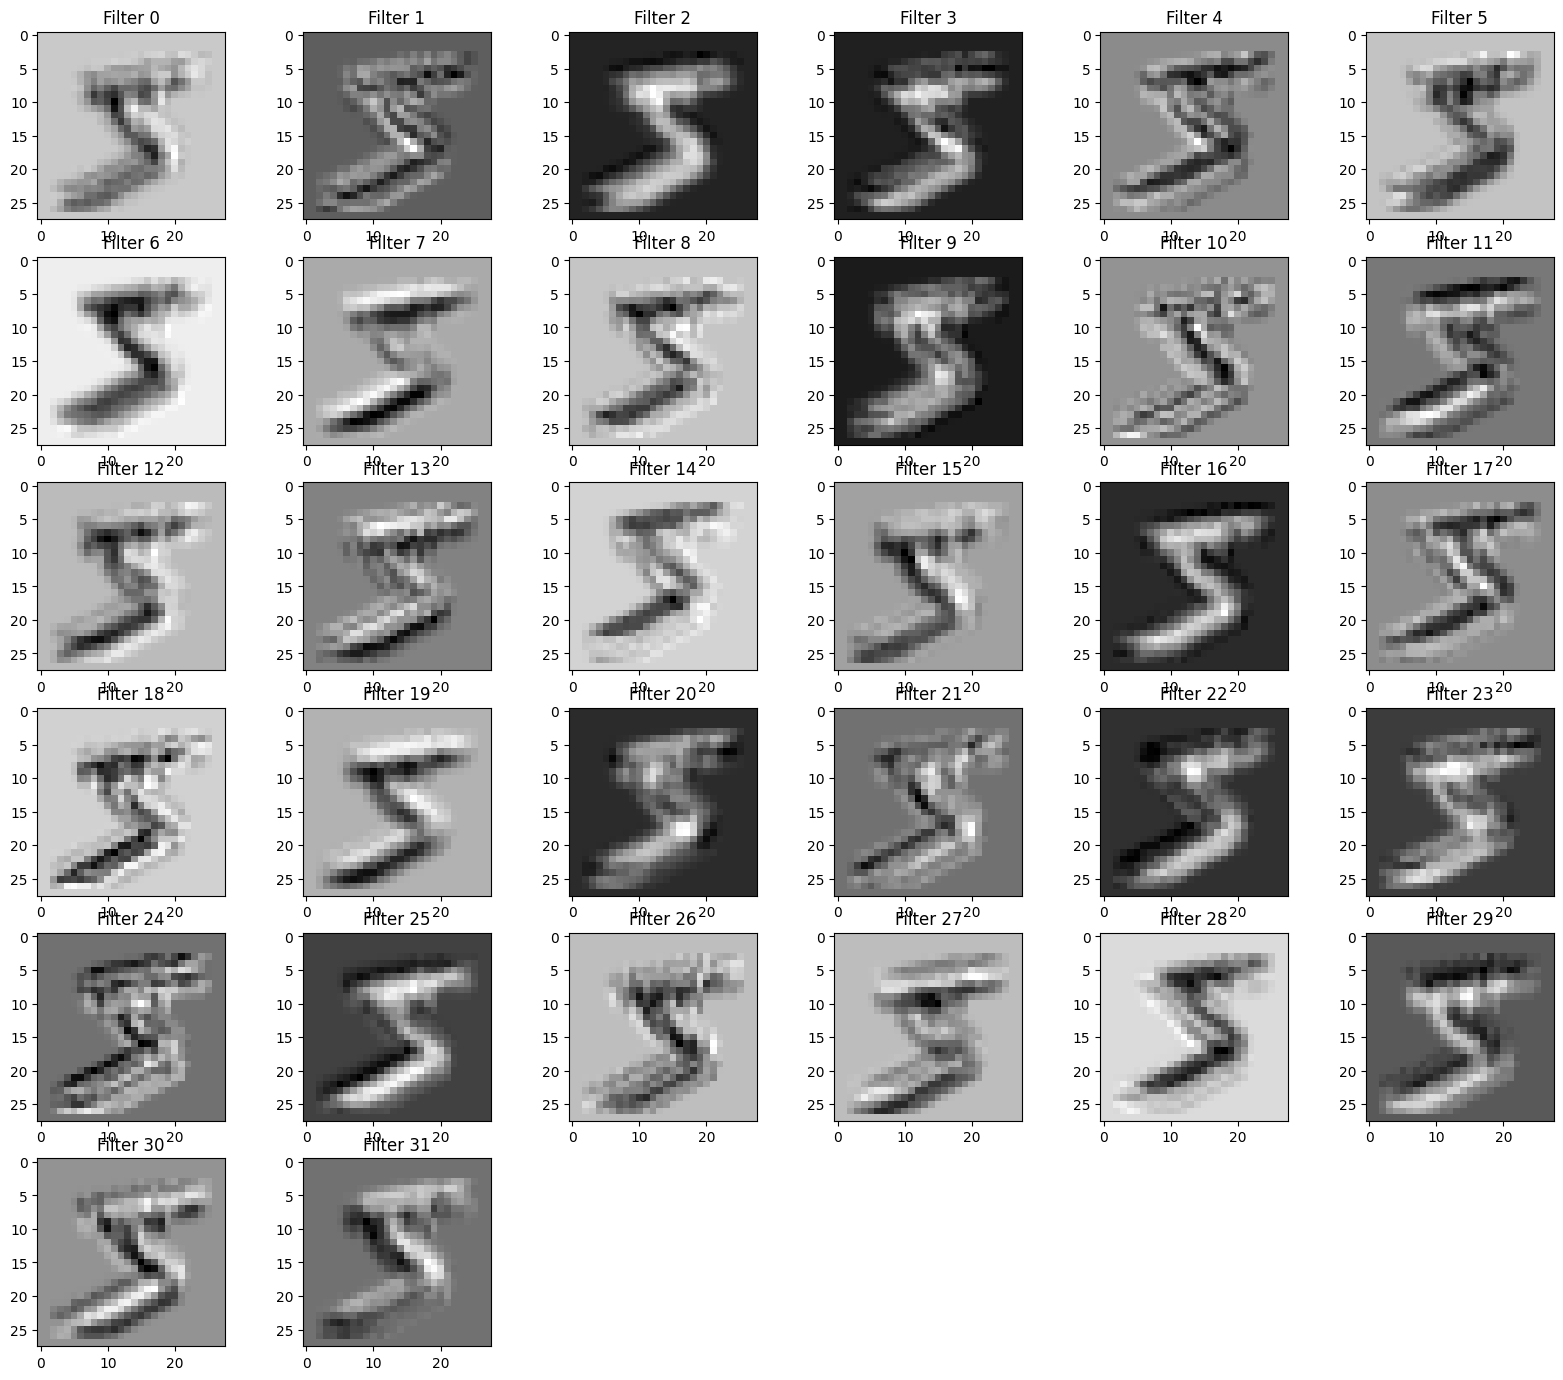

In [57]:
#ActivatedUnits = sess.run(convolve1,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
keep_prob=1.0
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve1(sampleimage)

filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 6
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

<ipython-input-58-5ece6de60453>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  n_rows = np.math.ceil(filters / n_columns) + 1


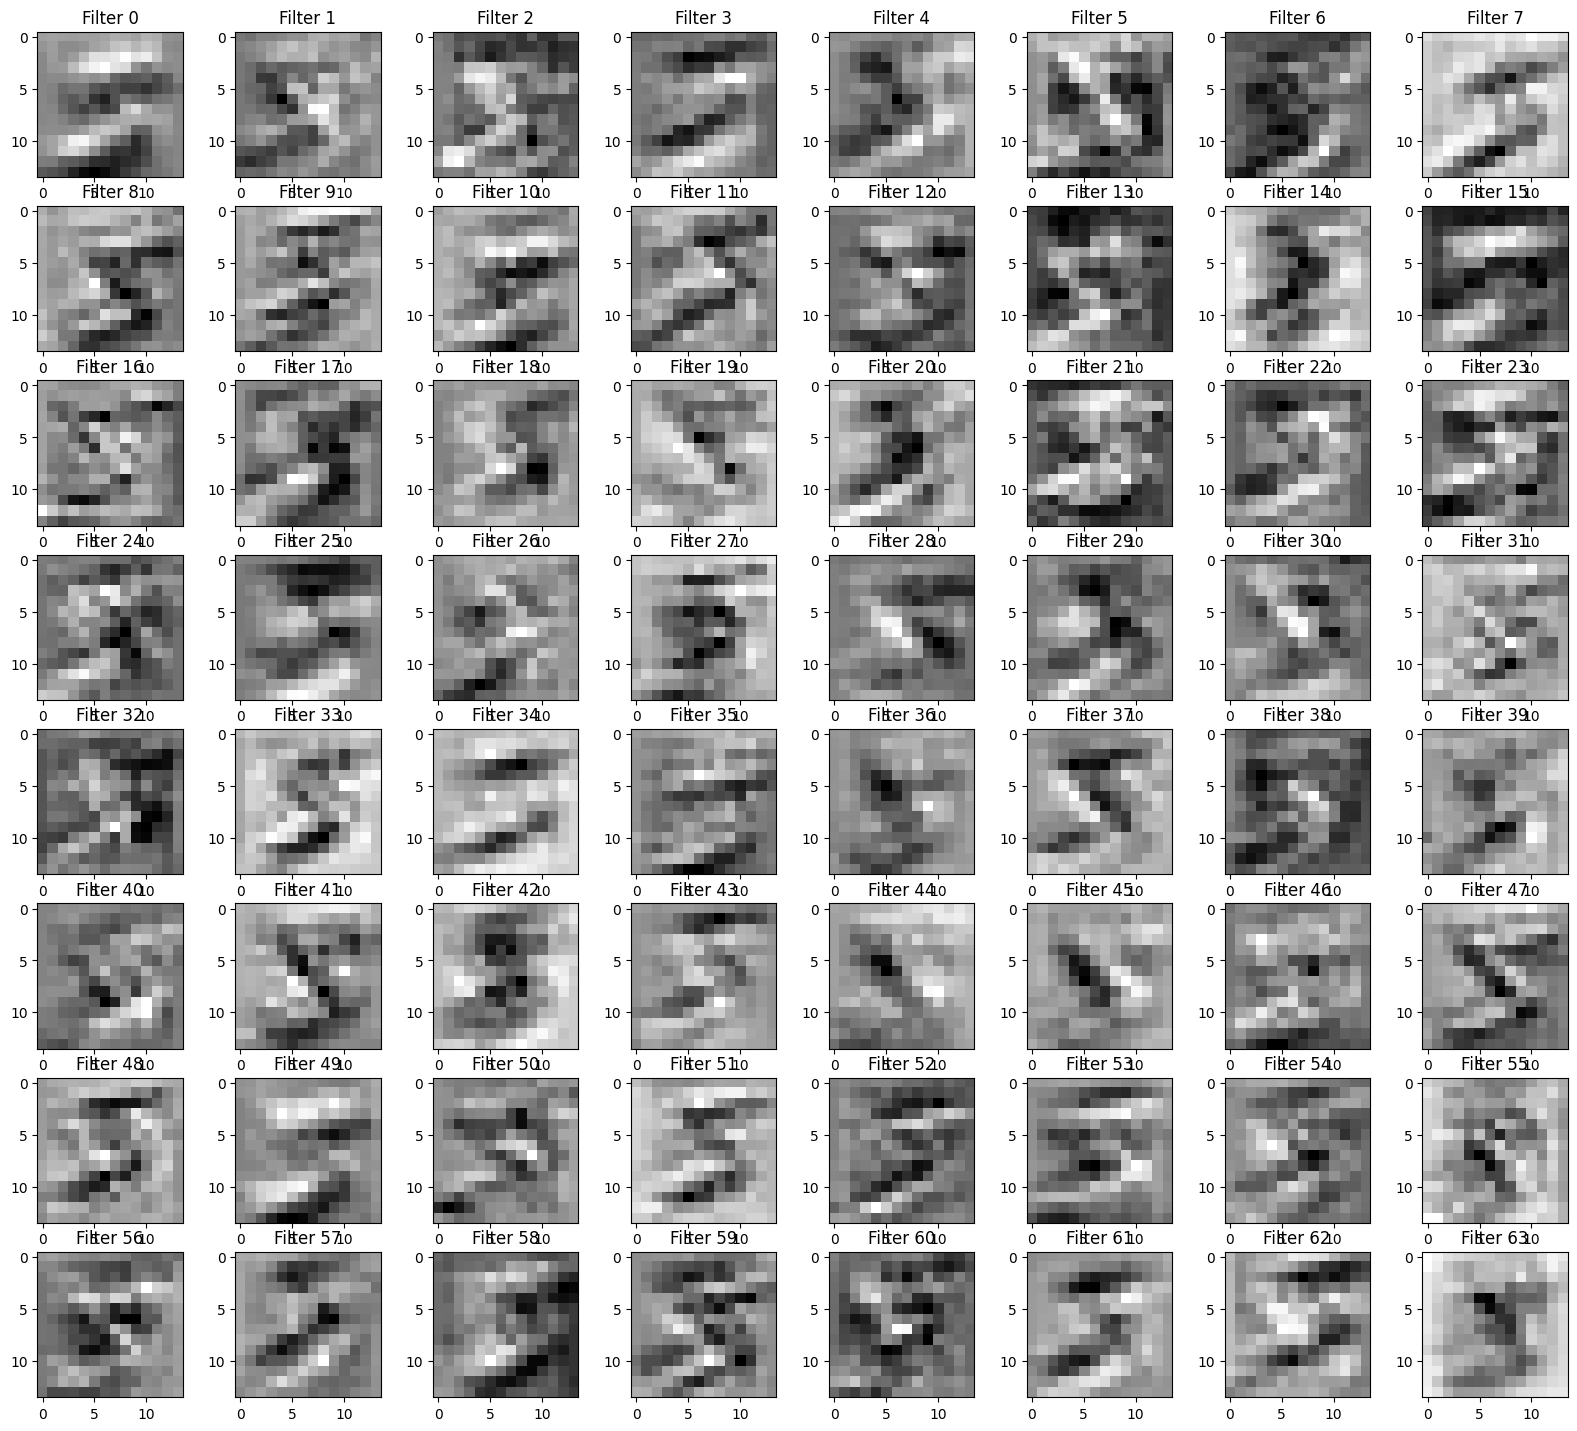

In [58]:
#ActivatedUnits = sess.run(convolve2,feed_dict={x:np.reshape(sampleimage,[1,784],order='F'),keep_prob:1.0})
sampleimage = np.array(sampleimage)
ActivatedUnits = convolve2(sampleimage)
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")